## Redes neuronales

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)


### Tipos de funciones de activación:
Fuente: https://mlfromscratch.com/activation-functions-explained/#/
![title](https://mlfromscratch.com/content/images/2019/12/activation-functions.gif)

![](http://grupo.us.es/gtocoma/pid/pid10/RedesNeuronales_archivos/image041.jpg)


### Funciones de pérdida:

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/lossfn.png)
Fuente: medium.com



### Descenso del gradiente (intuición)

- La deducción no es propósito de esta notebook, pero cada nuevo paso en busca de la minimización de la función de costo, obedece la siguiente regla:

$ v -> v' = v - \eta \nabla C$, donde $v$ es $f(w, b)$ y $\eta$ la tasa de aprendizaje (tamaño de paso, learning rate)

- Se da un paso en dirección opuesta al gradiente hasta minimizar la función de costo.

- Se le llama *backpropagation* al algoritmo que realiza esto iterativamente desde la última capa hasta la primera.

Fuente: https://kevinbinz.com/2019/05/26/intro-gradient-descent/

![title](https://kevinbinz.files.wordpress.com/2019/05/dualspace_explore.gif)

- Se quiere encontrar (x,y) tal que sea un mínimo en la superficie (función de costo).

Fuente: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

![title](https://miro.medium.com/max/819/1*hUd744hDEEGx0-ypWGhrkw.gif)


![title](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/approxTheorem.png)



### Algunos tipos de redes neuronales
Fuente: https://www.asimovinstitute.org/neural-network-zoo/
<div>
    <img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png", width="500">
</div>

## 1. Construyamos una red neuronal con keras para regresión

In [ ]:
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import OneHotEncoder

#### Analicemos si una red neuronal puede aprender las siguientes tres funciones:

* $line(x) = 2x+3$
* $quadratic(x) = x^2 +2$
* $quadtres(x_1,x_2,x_3) = x_1^2 + 2x_2 + x_3$

In [ ]:
def line(x):
    return 2*x + 3 + 0.05

def quadratic(x):
    return x**2 + 2 + 0.001

def quadtres(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i, 0]**2 + 2*x[i, 1] + x[i, 2]
    return y

In [ ]:
# Descomentar función para generar datos
# fn = line
# fn = quadratic
fn = quadtres

# Seleccionar número de puntos para el dataset
npoints = 1000
# ruido = 0.2*np.random.randn(npoints)

# Generar X
## para line y quadratic
# X = np.random.randint(0, 10, npoints) + ruido
###### para tercera opcion
ruido = 0.2*np.random.randn(npoints, 3)
X = np.random.rand(npoints, 3) + ruido

# Generar Y
Y = fn(X)

# Ver tabla de datos
## para line y quadratic
# data = pd.DataFrame(zip(X,Y), columns=['x', 'y'])

###### para quadtres
data =pd.DataFrame(zip(X[:,0], X[:,1], X[:,2], Y), columns=['$x_1$', '$x_2$', '$x_3$', 'y'])


data.head(5)

,$x_1$,$x_2$,$x_3$,y
0,0.177891,1.075802,0.691178,2.874427
1,-0.112380,0.629331,0.679569,1.950860
2,0.336359,0.013396,0.278224,0.418153
3,0.966599,0.314515,0.551492,2.114835
4,0.607942,0.439239,0.726290,1.974362


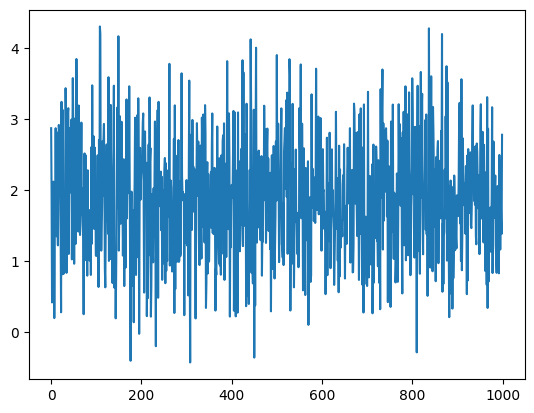

In [ ]:
# plt.scatter(X, Y)

###### Descomentar para el tercer caso
plt.plot(Y)

In [ ]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(X.reshape(-1,1))

X_train, X_val = train_test_split(X, train_size=0.8, shuffle=True, random_state=1)
Y_train, Y_val = train_test_split(Y, train_size=0.8, shuffle=True, random_state=1)
# Comentar para el último ejemplo
# X_train = scaler.transform(X_train.reshape(-1,1))
# X_val = scaler.transform(X_val.reshape(-1,1))


In [ ]:
# Red neuronal
model = Sequential()

# n_input debe coincidir con el número de variables independientes,
# atributos o columnas.
n_input = 3
###### Para el tercer caso n_input = 3
# n_input = 3
hidden_1 = 50
hidden_2 = 20
hidden_3 = 10
# n_output debe coincidir con el número de variables
# dependientes o etiquetas o clases.
n_output = 1

# Input layer and first hidden layer.
# La primer linea es la única que requiere el input_dim y nos incluye
# la capa de entrada y la primera capa oculta.
model.add(K.layers.Dense(hidden_1, input_dim=n_input, activation='relu'))
# Hidden layers
model.add(K.layers.Dense(hidden_2, activation='relu'))
model.add(K.layers.Dense(hidden_3, activation='relu'))
model.add(K.layers.Dense(100, activation='relu'))
model.add(K.layers.Dense(100, activation='relu'))

# Output layer
model.add(K.layers.Dense(n_output, activation='linear'))

optimizer = K.optimizers.Adam(learning_rate=0.0001)

# Se compila el modelo, eligiendo Optimizador y Función de pérdida.
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# callbacks = [K.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                        min_delta=0.0,
#                                        patience=2,
#                                        restore_best_weights=True)]

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 50)                200       
                                                                 
 dense_44 (Dense)            (None, 20)                1020      
                                                                 
 dense_45 (Dense)            (None, 10)                210       
                                                                 
 dense_46 (Dense)            (None, 100)               1100      
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 1)                 101       
                                                                 
Total params: 12731 (49.73 KB)
Trainable params: 1273

In [ ]:
epochs = 50
bs = 16

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    epochs=epochs, batch_size=bs)

Epoch 1/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0158 - val_loss: 0.0096
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.0079
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0114 - val_loss: 0.0068
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0098 - val_loss: 0.0056
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0048
Epoch 6/50
50/50 [==============================] - 1s 19ms/step - loss: 0.0076 - val_loss: 0.0043
Epoch 7/50
50/50 [==============================] - 1s 14ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 8/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 9/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 10/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 11/50
50/50

In [ ]:
nlayer = 0
weights, biases = model.layers[nlayer].get_weights()
# weights

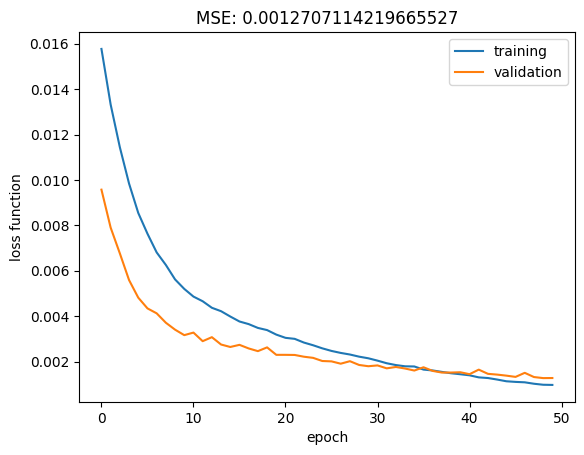

In [ ]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

**Revisar el comportamiento de las curvas de la función de pérdida:** https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

In [ ]:
Y_pred = model.predict(X_val)

7/7 [==============================] - 0s 2ms/step


### Ejercicio: repetir los tres ejemplos y hacer predicciones de dos diferentes vectores para cada una de las tres funciones.

In [ ]:
# new_vector = np.array([9])
new_vector = np.array([0.8, 0.5, 0.8]).reshape(1,-1)
prediction = model.predict(new_vector)

print("Valor real: {}".format(float(fn(new_vector))))
print("Predicción: {}".format(float(prediction)))
prediction

1/1 [==============================] - 0s 20ms/step
Valor real: 2.4400000000000004
Predicción: 2.4631474018096924


array([[2.4631474]], dtype=float32)

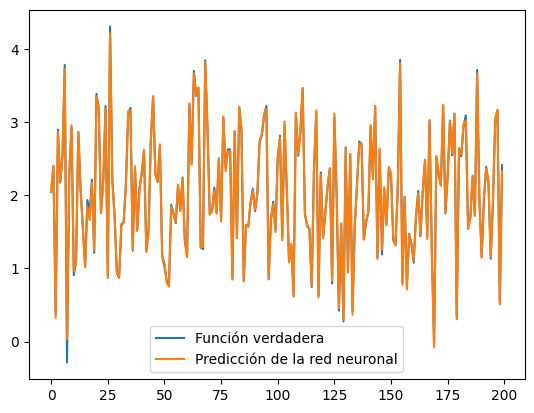

In [ ]:
# # Graficar para los primeros dos casos
# plt.scatter(X_val, Y_val, alpha=0.5, label='Función verdadera')
# plt.scatter(X_val, Y_pred, alpha=0.5, label='Predicción de la red neuronal')

### Descomentar siguientes dos para el tercer ejemplo.
plt.plot(Y_val, label='Función verdadera')
plt.plot(Y_pred, label='Predicción de la red neuronal')
# plt.xlabel("X")
# plt.ylabel("Y")

plt.legend()

## Clasificación con ANN

In [ ]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_test, x_val = train_test_split(x_test, test_size=0.5, random_state=0)
y_test, y_val = train_test_split(y_test, test_size=0.5, random_state=0)

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique val labels
unique, counts = np.unique(y_val, return_counts=True)
print("\nValidation labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Validation labels:  {0: 496, 1: 565, 2: 506, 3: 499, 4: 502, 5: 451, 6: 456, 7: 526, 8: 490, 9: 509}

Test labels:  {0: 484, 1: 570, 2: 526, 3: 511, 4: 480, 5: 441, 6: 502, 7: 502, 8: 484, 9: 500}


In [ ]:
np.shape(x_train), np.shape(x_val), np.shape(x_test)

((60000, 28, 28), (5000, 28, 28), (5000, 28, 28))

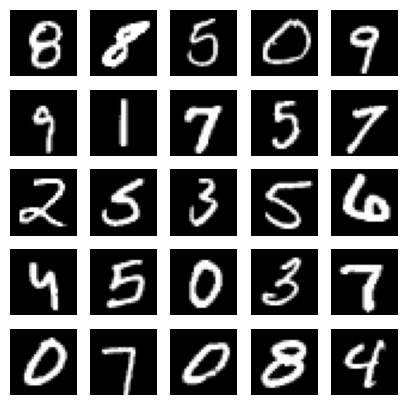

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
y_test

array([5, 2, 9, ..., 1, 1, 6], dtype=uint8)

In [ ]:
np.shape(y_train), np.shape(y_test)

((60000,), (5000,))

In [ ]:
# np.shape(x_train[0])
# print(x_train[10])

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.shape(y_train), np.shape(y_test)

((60000, 10), (5000, 10))

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
x_val = np.reshape(x_val, [-1, input_size])
x_val = x_val.astype('float32') / 255

#### Dropout

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/dropout.gif)

In [ ]:
# network parameters
batch_size = 128
hidden_units = 50
dropout = 0.1

La función de activación softmax se usa para clasificación de varias etiquetas.

$$P(y=j|x)=\frac{e^{w^T_jx+b_j}}{\sum_k e^{w^T_kx+b_k}}$$

![](https://developers.google.com/static/machine-learning/crash-course/images/SoftmaxLayer.svg)
Fuente: Google developers

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 50)                39250     
                                                                 
 activation_18 (Activation)  (None, 50)                0         
                                                                 
 dropout_12 (Dropout)        (None, 50)                0         
                                                                 
 dense_68 (Dense)            (None, 50)                2550      
                                                                 
 activation_19 (Activation)  (None, 50)                0         
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_69 (Dense)            (None, 10)              

##### Función de costo 'categorical cross entropy' para clasificación de varias etiquetas.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5332 - accuracy: 0.8400 - val_loss: 0.2160 - val_accuracy: 0.9358
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2429 - accuracy: 0.9271 - val_loss: 0.1489 - val_accuracy: 0.9558
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1880 - accuracy: 0.9444 - val_loss: 0.1213 - val_accuracy: 0.9628
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1605 - accuracy: 0.9506 - val_loss: 0.1060 - val_accuracy: 0.9672
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1417 - accuracy: 0.9572 - val_loss: 0.1020 - val_accuracy: 0.9686
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1291 - accuracy: 0.9607 - val_loss: 0.0912 - val_accuracy: 0.9684
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1164 - accuracy: 0.9651 - val_loss: 0.0845 - val_accuracy: 0.9736
Epoch 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


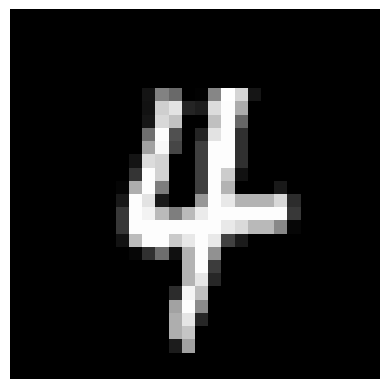

In [ ]:
# elegir un indice entre 0 y 5000
idx = np.random.randint(0, 5000, 1)
prueba = x_test[idx].reshape(28, 28)
plt.imshow(prueba, cmap='gray')
plt.axis('off')
print(y_test[idx])

In [ ]:
prediccion = model.predict(prueba.reshape(1,-1))
np.argmax(prediccion)

1/1 [==============================] - 0s 64ms/step


4

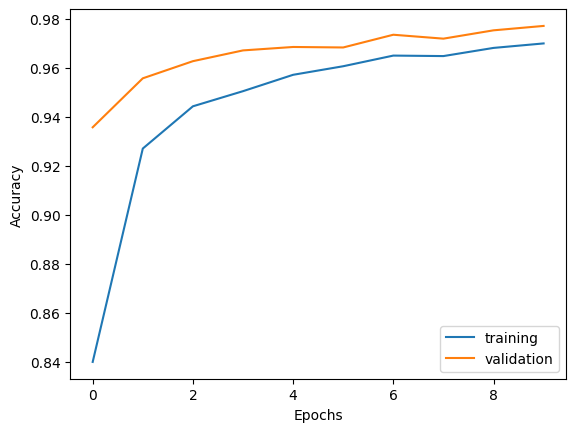

In [ ]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# plt.ylim(0.1, 1)
plt.legend()

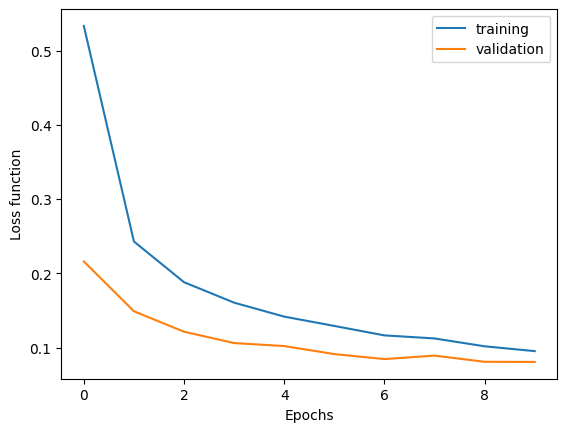

In [ ]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
# plt.ylim(0.1, 1)
plt.legend()

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss function: {:.3f}".format(loss))

40/40 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9674

Test accuracy: 96.7%

Test loss function: 0.100


### Ejercicio:

1. Calcular otras métricas.
2. Describe el preprocesamiento de las imágenes para entrenar la red neuronal.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
test_predictions = model.predict(x_test)

157/157 [==============================] - 1s 4ms/step


In [ ]:
np.shape(test_predictions)

(5000, 10)

In [ ]:
confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))
confusion

array([[479,   0,   0,   1,   0,   1,   2,   0,   1,   0],
       [  0, 564,   1,   1,   0,   1,   2,   0,   1,   0],
       [  4,   0, 503,   5,   1,   0,   3,   2,   8,   0],
       [  0,   0,   3, 494,   0,   5,   0,   5,   3,   1],
       [  1,   0,   0,   0, 464,   0,   2,   1,   1,  11],
       [  1,   0,   0,   9,   1, 424,   2,   1,   1,   2],
       [  3,   2,   0,   0,   3,   2, 491,   0,   1,   0],
       [  1,   2,   5,   2,   0,   0,   0, 487,   0,   5],
       [  4,   1,   0,   9,   4,   5,   3,   2, 453,   3],
       [  2,   2,   0,   5,   7,   0,   0,   4,   2, 478]])

In [ ]:
# para graficar matriz de confusion de mas de una clase
import seaborn as sns

def plot_cm(Y_test, Y_pred, labels, porcentaje=False, cbar=False, ax=None):
    matrix = confusion_matrix(Y_test, Y_pred)
    #Aquí se divide si queremos en porcentaje o números
    if porcentaje==False:
        ax = sns.heatmap(matrix, annot=True, cmap="Spectral_r", cbar=cbar, cbar_kws={'label': 'scale'}, ax=ax)
#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    if porcentaje==True:
        m=np.zeros(matrix.shape)
        for j in range(0,matrix.shape[1]):
            m[:,j]=matrix[:,j]/np.sum(matrix[:,j])*100

        ax = sns.heatmap(m, annot=True,cmap='Spectral_r', cbar=cbar, cbar_kws={'label': 'scale'}, ax=ax)

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # ax.set(xlabel="True label", ylabel="Predicted label")

    return ax


Text(33.22222222222222, 0.5, 'True label')

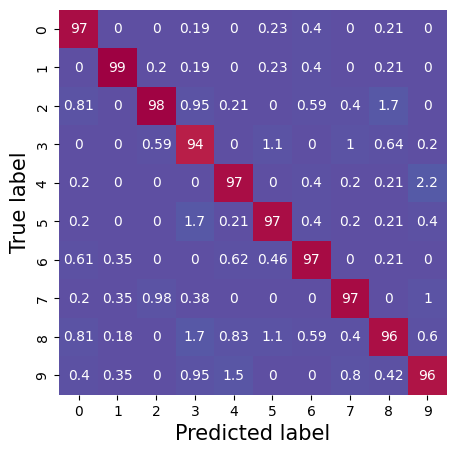

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot_cm(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1), labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], porcentaje=True, ax=ax)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)

In [ ]:
# Otras metricas
from sklearn.metrics import precision_score, classification_report

print("Precisión: ", precision_score(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1), average='micro'))

classification_report(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))

Presición:  0.9674


'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       484\n           1       0.99      0.99      0.99       570\n           2       0.98      0.96      0.97       526\n           3       0.94      0.97      0.95       511\n           4       0.97      0.97      0.97       480\n           5       0.97      0.96      0.96       441\n           6       0.97      0.98      0.98       502\n           7       0.97      0.97      0.97       502\n           8       0.96      0.94      0.95       484\n           9       0.96      0.96      0.96       500\n\n    accuracy                           0.97      5000\n   macro avg       0.97      0.97      0.97      5000\nweighted avg       0.97      0.97      0.97      5000\n'

### Práctica:

Diseñar y entrenar otra red neural para otro conjunto de datos, explicar si se trata de una regresión o clasificación. Sugerencia: para facilidad, usar el dataset iris.


### Ejercicio:

Visitar https://playground.tensorflow.org, resolver dos de las situaciones planteadas ahí para clasificación, describir y justificar los hiperparámetros elegidos.